## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 5*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


5. Implementar un algoritmo de segmentación para imágenes RGB, utilizando de fondo un algoritmo de k-medias. Se debe permitir al usuario elegir el parámetro k ≥ 2 del número de segmentos que desea obtener. Mostrar con varios ejemplos (buenos y malos) los alcances y limitaciones de este algoritmo. Para cada caso, mostrar

    - la imagen original
    - el mapa de segmentos o clases
    - la imagen cuantizada (promedio de color en cada segmento).


Referencias:

- https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html
- https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/
- https://medium.com/swlh/image-segmentation-using-k-means-clustering-46a60488ae71
- https://www.sciencedirect.com/science/article/pii/S1877050915014143
- https://medium.com/mlearning-ai/k-means-clustering-71a875dbce3c

#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### *Definición de parámetros*

Posteriormente, se le pregunta al usuario la cantidad de clusters (K) que desea utilizar para la segmentación de la imagen. Asimismo, se define la ubicación de las distintas imágenes a probar.

In [2]:
def input_K_value():
    
    while True:

        try:
            K = int(input("Valor de K (K >= 2) a utilizar: "))

            if K < 2:
                print("Por favor ingrese un valor de K mayor o igual a 2")
            else:
                break

        except ValueError:
            print("Por favor ingrese un valor de K mayor o igual a 2")

    return K

In [3]:
# Leer las imágenes de la carpeta imgs
img_arbol = cv2.imread("imgs/arbol.jpg")
img_moneda = cv2.imread("imgs/moneda.jpg")
img_colorblind = cv2.imread("imgs/color-blind.jpeg")

# Solicitar el valor de K
k = input_K_value()

#### *Conversión de imágen a formato RGB*

Se utiliza CV2.COLOR_BGR2RGB para convertir la imagen a formato RGB. Esto se hace para que la imagen pueda ser leída por el algoritmo de K-Means nativo de OpenCV.

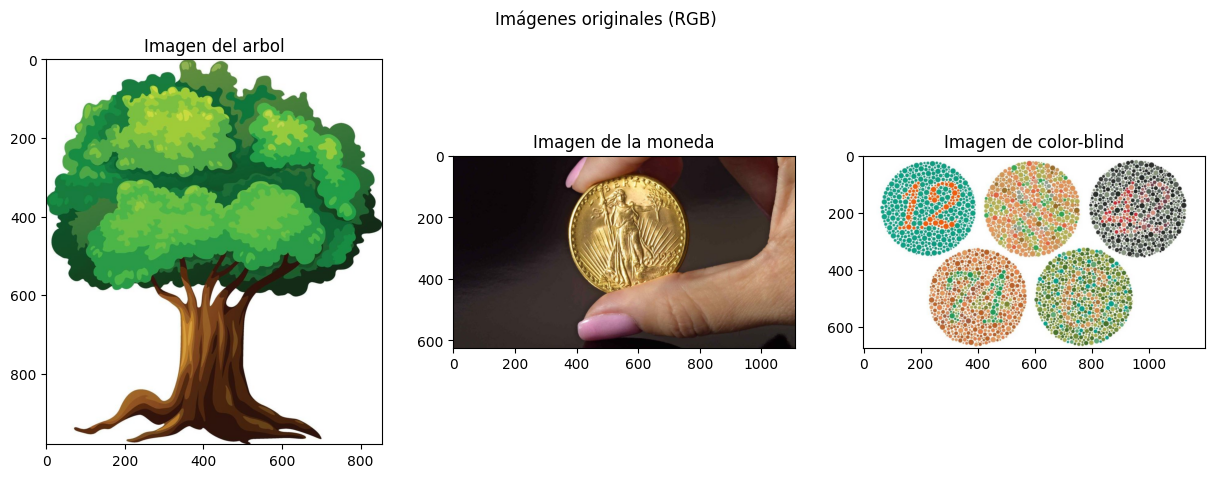

In [4]:
# Convertir las imágenes a RGB
    # Originalmente las imágenes están en BGR
img_arbol_rgb = cv2.cvtColor(img_arbol, cv2.COLOR_BGR2RGB)
img_moneda_rgb = cv2.cvtColor(img_moneda, cv2.COLOR_BGR2RGB)
img_colorblind_rgb = cv2.cvtColor(img_colorblind, cv2.COLOR_BGR2RGB)


# Mostrar las imágenes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Imágenes originales (RGB)")
axs[0].imshow(img_arbol_rgb)
axs[0].set_title("Imagen del arbol")
axs[1].imshow(img_moneda_rgb)
axs[1].set_title("Imagen de la moneda")
axs[2].imshow(img_colorblind_rgb)
axs[2].set_title("Imagen de color-blind")
plt.show()

#### *Reformatear imágenes*

El siguiente paso es transformar las matrices de las imágenes a un formato que pueda ser leído por el algoritmo de K-Means. Para ello, se reformatean las matrices de las imágenes a un formato de 2 dimensiones, donde cada fila representa un pixel de la imagen, y cada columna representa un canal de color (R, G, B).


Asimismo, se cambia el tipo de dato de las matrices de las imágenes a float32, para que puedan ser leídas por el algoritmo de K-Means.

In [5]:
# Reformatear las imágenes para que sean de 2 dimensiones
img_arbol_rgb_2d = img_arbol_rgb.reshape((-1, 3))
img_moneda_rgb_2d = img_moneda_rgb.reshape((-1, 3))
img_colorblind_rgb_2d = img_colorblind_rgb.reshape((-1, 3))

# Convertir las imágenes a float32
img_arbol_rgb_2d = np.float32(img_arbol_rgb_2d)
img_moneda_rgb_2d = np.float32(img_moneda_rgb_2d)
img_colorblind_rgb_2d = np.float32(img_colorblind_rgb_2d)

#### *K-Means para segmentación de imágenes*

Posteriormente, se definen los criterios de CV2 para llevar a cabo la segmentación con K-Means. 

In [6]:
# Definir los criterios
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Aplicar el algoritmo de K-Means
ret_arbol, label_arbol, center_arbol = cv2.kmeans(img_arbol_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret_moneda, label_moneda, center_moneda = cv2.kmeans(img_moneda_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
ret_colorblind, label_colorblind, center_colorblind = cv2.kmeans(img_colorblind_rgb_2d, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

Luego de aplicar K-Means, es necesario regresar los float32 a uint8 para que puedan ser leídos por CV2 nuevamente. Asimismo, se asignan los colores de los clusters a cada pixel de la imagen, y se reformatea la imagen a su tamaño original.

In [7]:
# Convertir los centros a uint8
center_arbol = np.uint8(center_arbol)
center_moneda = np.uint8(center_moneda)
center_colorblind = np.uint8(center_colorblind)

# Se asigna a cada pixel la etiqueta del centro más cercano
res_arbol = center_arbol[label_arbol.flatten()]
res_moneda = center_moneda[label_moneda.flatten()]
res_colorblind = center_colorblind[label_colorblind.flatten()]

# Reformatear las imágenes a su tamaño y forma original
label_arbol_3d = res_arbol.reshape((img_arbol.shape))
label_moneda_3d = res_moneda.reshape((img_moneda.shape))
label_colorblind_3d = res_colorblind.reshape((img_colorblind.shape))

#### *Resultados finales*

Finalmente, se puede mostrar la imagen final, el mapa de segmentos, y la imagen cuantizada.

In [11]:
def show_result(original, center, res, label):

    fig, axs = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle("K = " + str(k))

    axs[0].imshow(original)
    axs[0].set_title("Imagen Original")

    axs[1].imshow(center.reshape((1, -1, 3)))
    axs[1].set_title("Clases detectadas (KNN)")

    axs[2].imshow(res)
    axs[2].set_title("Imagen segmentada")

    # Mostrar grafica de barras con promedio de color en cada segmento
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([res], [i], None, [k], [0,256])
        axs[3].plot(hist, color = col)
        axs[3].set_title("Histograma de colores")




    plt.show()


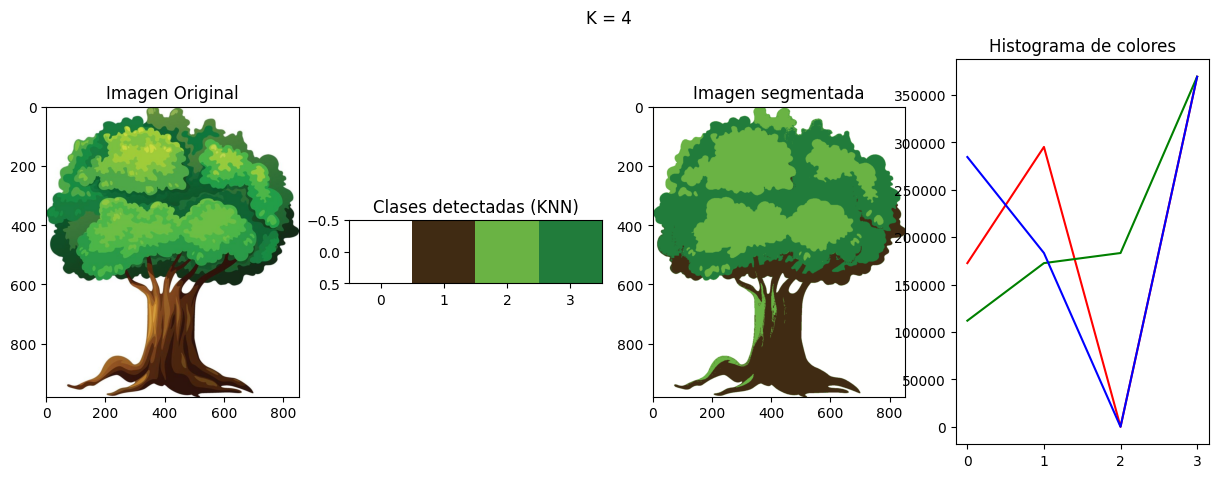

In [12]:
show_result(img_arbol_rgb, center_arbol, label_arbol_3d, label_arbol)

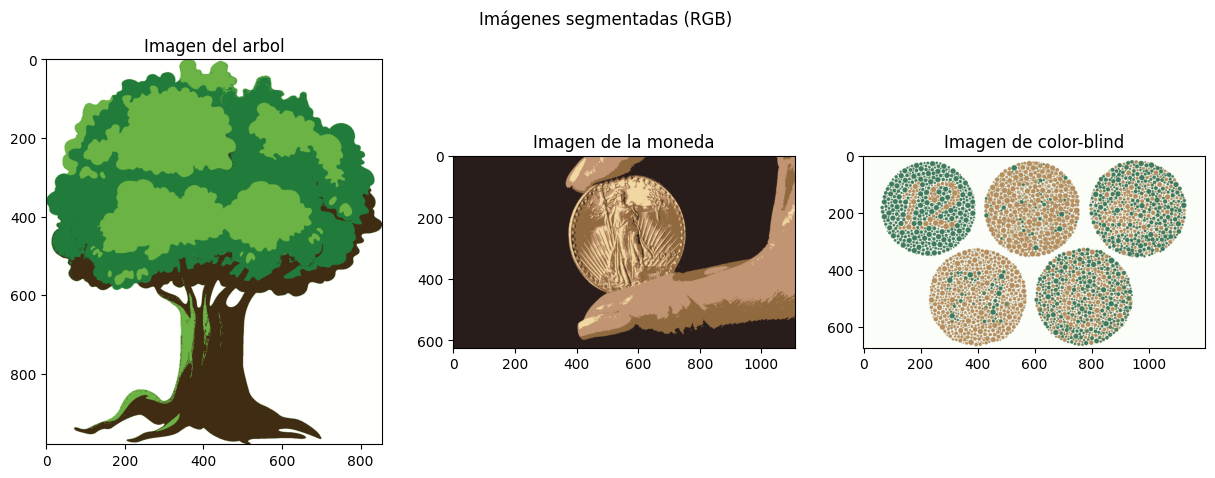

In [10]:


# Mostrar las imágenes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Imágenes segmentadas (RGB)")
axs[0].imshow(label_arbol_3d)
axs[0].set_title("Imagen del arbol")
axs[1].imshow(label_moneda_3d)
axs[1].set_title("Imagen de la moneda")
axs[2].imshow(label_colorblind_3d)
axs[2].set_title("Imagen de color-blind")
plt.show()
